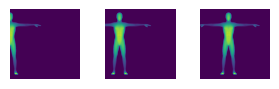

In [2]:
%load_ext autoreload
%autoreload 2

from text3d2video.artifacts.animation_artifact import AnimationArtifact
import torch

from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

animation = AnimationArtifact.from_wandb_artifact_tag("mixamo-sideways:latest")

frame_nums = [0, 10, 20]

device = torch.device("cuda")
meshes = animation.load_frames(frame_nums)
cams = animation.cameras(frame_nums)

display_ims(render_depth_map(meshes, cams), scale=1)

In [3]:
from text3d2video.rendering import UVShader, make_rasterizer, MeshRenderer

shader = UVShader()
rasterizer = make_rasterizer(cams)
renderer = MeshRenderer(rasterizer=rasterizer, shader=shader)

In [6]:
from pytorch3d.renderer import TexturesUV

verts_uvs, faces_uvs = texture_data = animation.texture_data()

empty_tex = TexturesUV(
    verts_uvs=verts_uvs.unsqueeze(0).to(device),
    faces_uvs=faces_uvs.unsqueeze(0).to(device),
    maps=torch.ones(1, 100, 100, 1).to(device),
)

meshes.textures = empty_tex

empty_tex.sample_textures

uv_maps = renderer(meshes)
print(uv_maps.shape)

torch.Size([3, 512, 512, 1, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85330045..2.1035707].


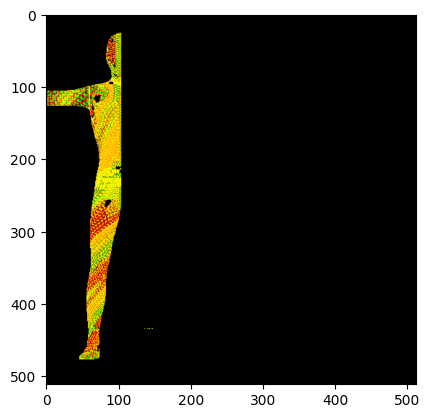

In [13]:
from matplotlib import pyplot as plt


uv_map = uv_maps[1, :, :, 0, :].cpu()

zero_channel = torch.zeros(uv_map.shape[0], uv_map.shape[1], 1)
uv_map_rgb = torch.cat([uv_map, zero_channel], dim=2)


plt.imshow(uv_map_rgb[:, :])